In [15]:
import pandas as pd
file_path = 'dognition_data_aggregated_by_dogid.xlsx'  
data = pd.read_excel(file_path)
data.head()



Dog ID  Total Tests Completed  \
0  fd27b272-7144-11e5-ba71-058fbc01cf0b                     21   
1  fd27b5ba-7144-11e5-ba71-058fbc01cf0b                     20   
2  fd27b6b4-7144-11e5-ba71-058fbc01cf0b                      2   
3  fd27b79a-7144-11e5-ba71-058fbc01cf0b                     11   
4  fd27b86c-7144-11e5-ba71-058fbc01cf0b                     31   

   Mean ITI (days)  Mean ITI (minutes)  Median ITI (days)  \
0        28.201076        40609.549167           0.004687   
1         0.413307          595.162281           0.005845   
2         0.009132           13.150000           0.009132   
3        56.115179        80805.858333           0.004433   
4         7.734254        11137.326111           0.000399   

   Median ITI (minutes)  Time diff between first and last game (days)  \
0              6.750000                                    564.021516   
1              8.416667                                      7.852836   
2             13.150000                                      0.009132   
3              6.383333                                    561.151794   
4              0.575000                                    232.027627   

   Time diff between first and last game (minutes)  \
0                                    812190.983333   
1                                     11308.083333   
2                                        13.150000   
3                                    808058.583333   
4                                    334119.783333   

                                User ID  Gender  ...  Membership_ID  \
0  ce134e42-7144-11e5-ba71-058fbc01cf0b  female  ...            2.0   
1  ce1353d8-7144-11e5-ba71-058fbc01cf0b    male  ...            1.0   
2  ce135ab8-7144-11e5-ba71-058fbc01cf0b    male  ...            1.0   
3  ce13507c-7144-11e5-ba71-058fbc01cf0b    male  ...            1.0   
4  ce135e14-7144-11e5-ba71-058fbc01cf0b  female  ...            2.0   

  Subscribed         City State    Zip  Country  Exclude Free_Start_User  \
0        1.0  Grand Forks    ND  58201       US        0               0   
1        1.0        Barre    MA  01005       US        0               0   
2        1.0       Darien    CT  06820       US        0               0   
3        1.0     Winnetka    IL  60093       US        0               0   
4        1.0      Raleigh    NC  27606       US        1               0   

        Last_Active_At  Membership_Type  
0  2015-03-12 00:25:00                2  
1             00:00:00                1  
2             00:00:00                1  
3  2014-09-12 19:26:00                1  
4             00:00:00                2  

[5 rows x 30 columns]

In [17]:
dimension_analysis = data.groupby('Dimension')['Total Tests Completed'].mean()
print(dimension_analysis)


Dimension
0                   6.227207
ace                21.767296
charmer            21.571014
einstein           21.635659
expert             21.560403
maverick           21.287823
protodog           21.724252
renaissance-dog    21.415686
socialite          21.436280
stargazer          21.229917
Name: Total Tests Completed, dtype: float64


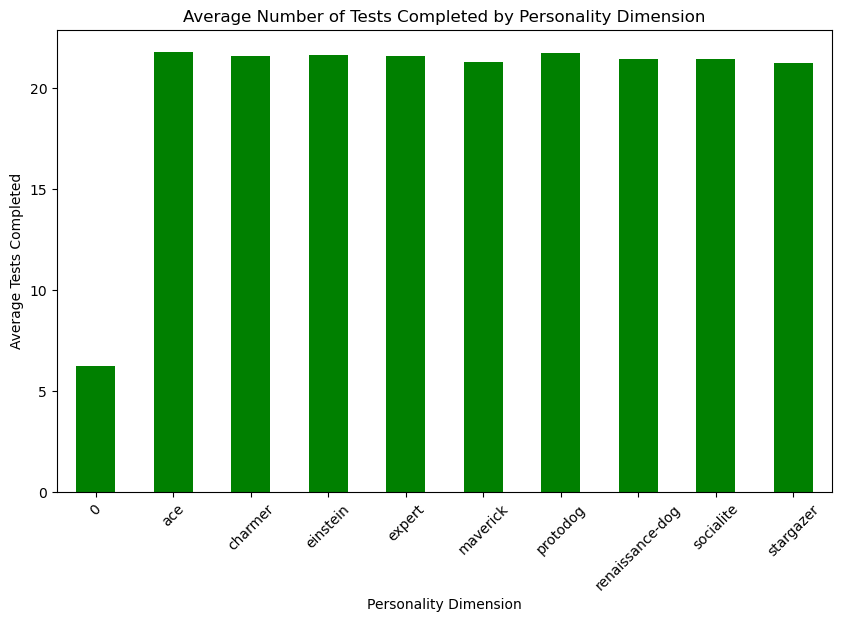

In [33]:
import matplotlib.pyplot as plt  
# Create a bar plot
plt.figure(figsize=(10, 6))  
dimension_analysis.plot(kind='bar', color='green')  
plt.title('Average Number of Tests Completed by Personality Dimension')  
plt.xlabel('Personality Dimension') 
plt.ylabel('Average Tests Completed')  
plt.xticks(rotation=45)  
plt.show()  


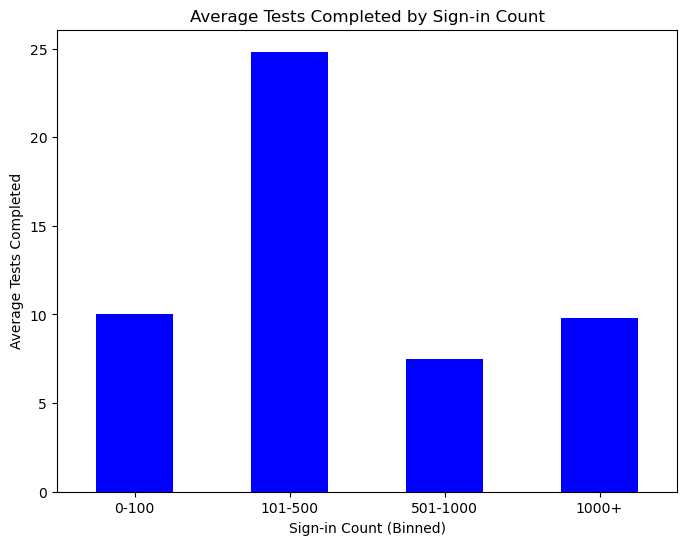

In [59]:
import pandas as pd
import matplotlib.pyplot as plt


bins = [0, 100, 500, 1000, data['Sign_in_Count'].max()]  
labels = ['0-100', '101-500', '501-1000', '1000+']  


data['Sign_in_Binned'] = pd.cut(data['Sign_in_Count'], bins=bins, labels=labels)


binned_sign_in_analysis = data.groupby('Sign_in_Binned', observed=False)['Total Tests Completed'].mean()


plt.figure(figsize=(8, 6))
binned_sign_in_analysis.plot(kind='bar', color='blue')
plt.title('Average Tests Completed by Sign-in Count')
plt.xlabel('Sign-in Count (Binned)')
plt.ylabel('Average Tests Completed')
plt.xticks(rotation=0) 
plt.show()


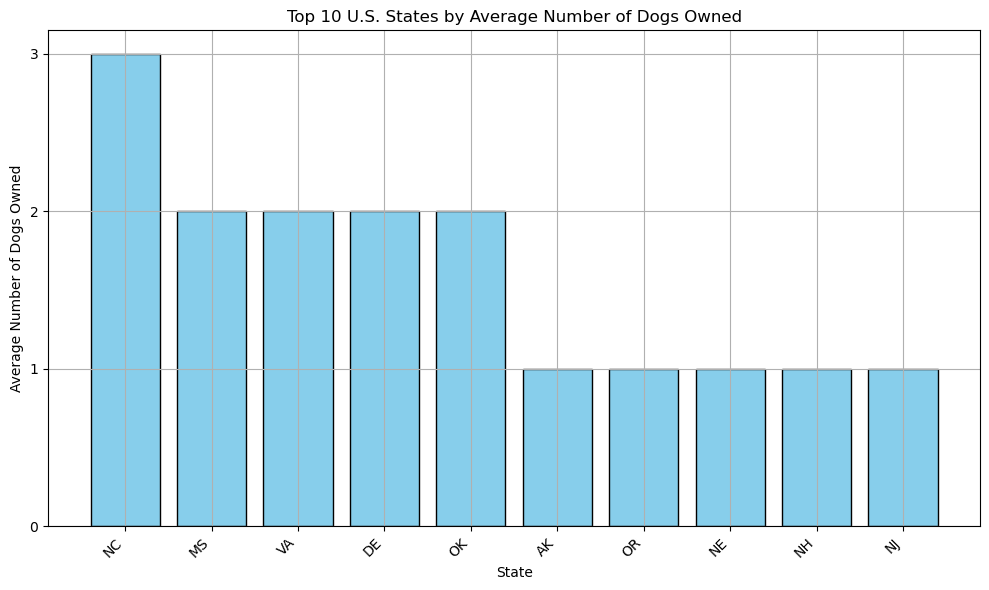

In [91]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'dognition_data_aggregated_by_dogid.xlsx'
data = pd.read_excel(file_path)


us_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 
    'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 
    'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 
    'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]


data['State'] = data['State'].astype(str)
data = data[data['State'].isin(us_states)]

dogs_per_state = data.groupby('State')['Max_Dogs'].mean().round(0).reset_index()


dogs_per_state = dogs_per_state.sort_values(by='Max_Dogs', ascending=False)


top_states = dogs_per_state.head(10)


plt.figure(figsize=(10, 6))
plt.bar(top_states['State'], top_states['Max_Dogs'], color='skyblue', edgecolor='black')
plt.title('Top 10 U.S. States by Average Number of Dogs Owned')
plt.xlabel('State')
plt.ylabel('Average Number of Dogs Owned')
plt.xticks(rotation=45, ha='right')  
plt.yticks(range(0, int(top_states['Max_Dogs'].max()) + 1))  
plt.grid(True)
plt.tight_layout()
plt.show()















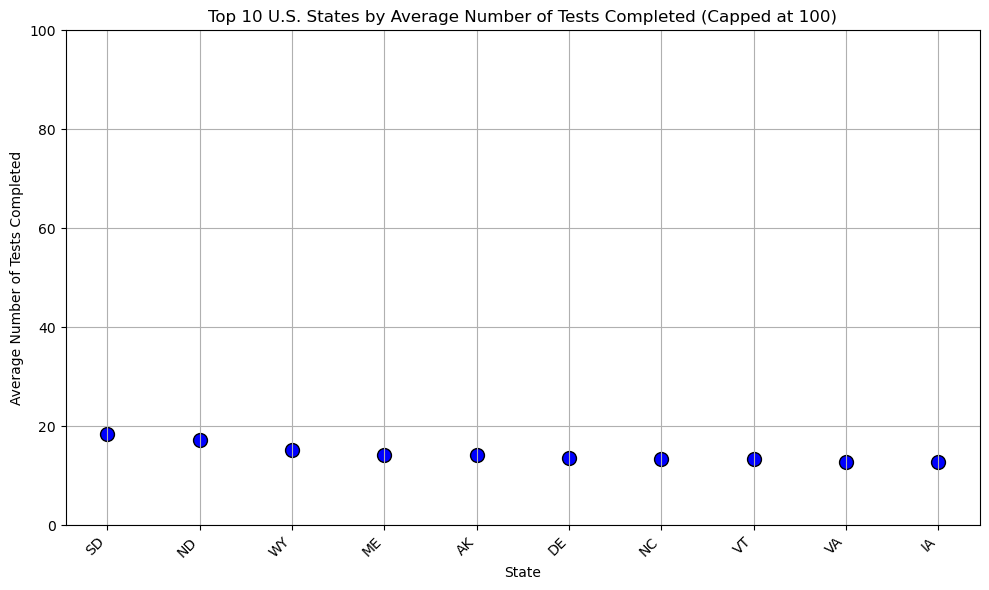

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'dognition_data_aggregated_by_dogid.xlsx'
data = pd.read_excel(file_path)

# Filter U.S. states
us_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
    'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV',
    'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
    'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

# Ensure the State column contains only valid strings and filter for U.S. states
data['State'] = data['State'].astype(str)
data = data[data['State'].isin(us_states)]

# Filter users who have completed up to 100 tests (cap the number of tests)
data_filtered = data[data['Total Tests Completed'] <= 100]

# Group by State and calculate the average number of tests completed per user in each state
avg_tests_per_state = data_filtered.groupby('State')['Total Tests Completed'].mean().reset_index()

# Sort the data by average number of tests completed for better visualization
avg_tests_per_state = avg_tests_per_state.sort_values(by='Total Tests Completed', ascending=False)

# Limit the data to the top 10 U.S. states with the highest average number of tests completed
top_states = avg_tests_per_state.head(10)

# Create a scatter plot to show the average number of tests completed per state (Top 10 states)
plt.figure(figsize=(10, 6))
plt.scatter(top_states['State'], top_states['Total Tests Completed'], color='blue', s=100, edgecolor='black')
plt.title('Top 10 U.S. States by Average Number of Tests Completed (Capped at 100)')
plt.xlabel('State')
plt.ylabel('Average Number of Tests Completed')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 100)  # Cap y-axis at 100 tests
plt.grid(True)
plt.tight_layout()
plt.show()

